In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn')

In [2]:
def plot_f(ax, f, limit=10, interval=1, elev=45, azim=30):
    xs = np.arange(-limit, +limit, interval)
    ys = np.arange(-limit, +limit, interval)
    x0, x1 = np.meshgrid(xs, ys, sparse=True)
    ax.plot_surface(x0, x1, f([x0, x1]) , cmap=plt.cm.jet, alpha=0.7)
    ax.view_init(elev=elev, azim=azim)
    return ax

def plot_path(ax, f, xs, ys, label):
    ax.plot(xs, ys, f([xs, ys]), color='k', marker='o', markersize=6, label=label)
    return ax

In [3]:
def numerical_gradident(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for i, val in enumerate(x):
        # f(x + h)
        x[i] = val + h
        f1 = f(x)
        # f(x - h)
        x[i] = val - h
        f2 = f(x)
        # grad
        grad[i] = (f1 - f2) / (2 * h)
        # restore
        x[i] = val
    return grad

In [4]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    path = np.zeros((step_num + 1, init_x.size), dtype=np.float32)
    path[0] = init_x
    for i in range(1, step_num + 1):
        grad = numerical_gradident(f, path[i - 1])
        path[i] = path[i - 1] - (lr * grad)
    return path

[ 2.034752e-09 -2.034752e-09]


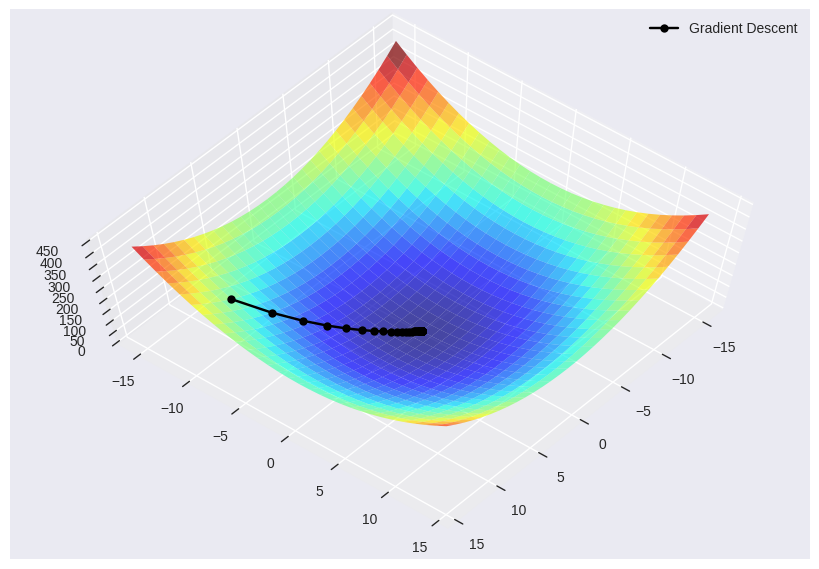

In [5]:
def f(x):
    return x[0]**2 + x[1]**2
path = gradient_descent(f, np.array([10.0, -10.0]), lr=0.1, step_num=100)
print(path[-1])

fig = plt.figure(dpi=100)
ax = Axes3D(fig)
ax = plot_f(ax, f, elev=70, azim=40, limit=15)
ax = plot_path(ax, f, path[:, 0], path[:, 1], 'Gradient Descent')
ax.legend()
plt.show()

[ 4.314019e-04 -9.301449e-13]


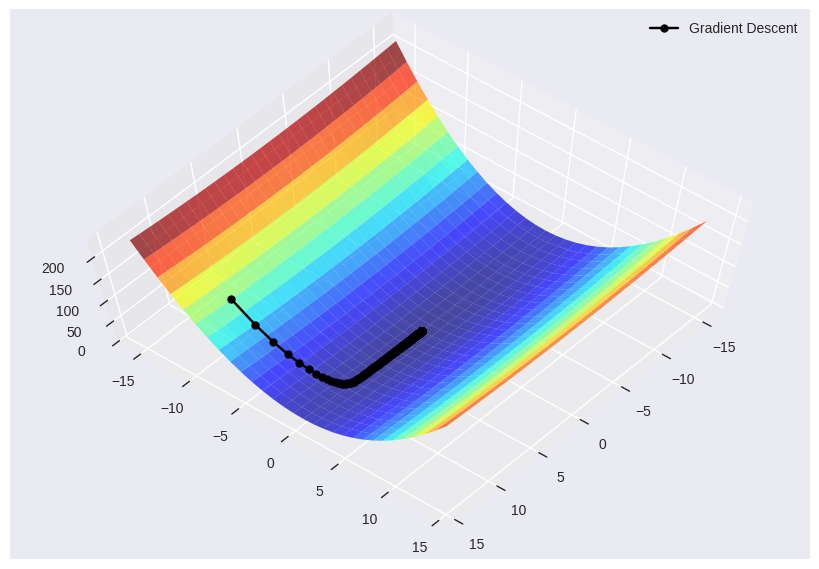

In [6]:
def f(x):
    return x[0]**2 / 20 + x[1]**2
path = gradient_descent(f, np.array([10.0, -10.0]), lr=0.1, step_num=1000)
print(path[-1])

fig = plt.figure(dpi=100)
ax = Axes3D(fig)
ax = plot_f(ax, f, elev=70, azim=40, limit=15)
ax = plot_path(ax, f, path[:, 0], path[:, 1], 'Gradient Descent')
ax.legend()
plt.show()

[0.9999733 0.9999732]


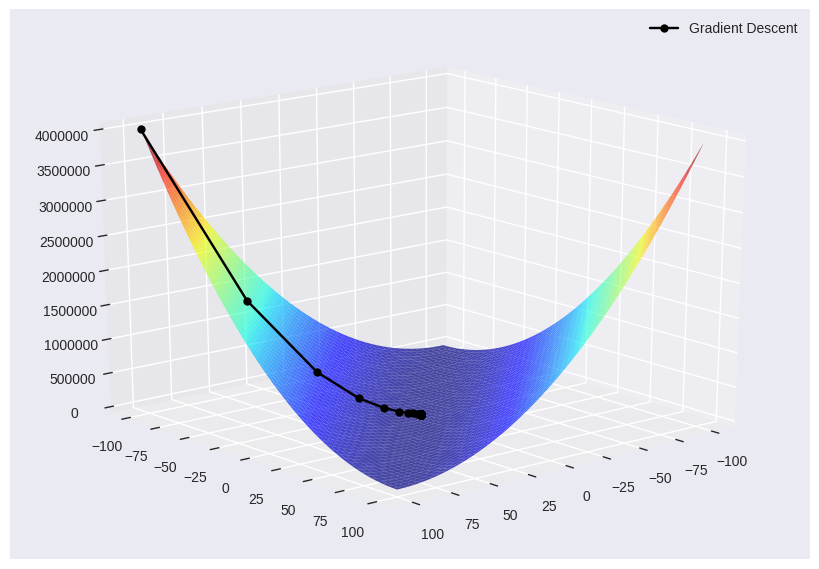

In [7]:
def f(x): # "fake" banana function
    return 100 * (x[1] - x[0]) ** 2 + (1 - x[0])**2

path = gradient_descent(f, np.array([100.0, -100.0]), lr=0.001, step_num=20000)
print(path[-1])

fig = plt.figure(dpi=100)
ax = Axes3D(fig)
ax = plot_f(ax, f, elev=20, azim=50, limit=100)
ax = plot_path(ax, f, path[:, 0], path[:, 1], 'Gradient Descent')
ax.legend()
plt.show()